In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
col_with_single_value=[]
col_with_2_value=[]
for col in telecom.columns:
    uniq_num = telecom[col].nunique()
    no_of_null = telecom[col].isna().sum()
    per_null = round((telecom[col].isna().sum()/telecom.shape[0])*100,2)
    print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)
    if uniq_num ==1:
        col_with_single_value.append(col)
    elif uniq_num == 2:
        col_with_2_value.append(col)

Column:  mobile_number , No of unique values:  99999 , no of null: 0  ,percentage null: 0.0
Column:  circle_id , No of unique values:  1 , no of null: 0  ,percentage null: 0.0
Column:  loc_og_t2o_mou , No of unique values:  1 , no of null: 1018  ,percentage null: 1.02
Column:  std_og_t2o_mou , No of unique values:  1 , no of null: 1018  ,percentage null: 1.02
Column:  loc_ic_t2o_mou , No of unique values:  1 , no of null: 1018  ,percentage null: 1.02
Column:  last_date_of_month_6 , No of unique values:  1 , no of null: 0  ,percentage null: 0.0
Column:  last_date_of_month_7 , No of unique values:  1 , no of null: 601  ,percentage null: 0.6
Column:  last_date_of_month_8 , No of unique values:  1 , no of null: 1100  ,percentage null: 1.1
Column:  last_date_of_month_9 , No of unique values:  1 , no of null: 1659  ,percentage null: 1.66
Column:  arpu_6 , No of unique values:  85681 , no of null: 0  ,percentage null: 0.0
Column:  arpu_7 , No of unique values:  85308 , no of null: 0  ,percent

Column:  loc_ic_t2m_mou_6 , No of unique values:  22065 , no of null: 3937  ,percentage null: 3.94
Column:  loc_ic_t2m_mou_7 , No of unique values:  21918 , no of null: 3859  ,percentage null: 3.86
Column:  loc_ic_t2m_mou_8 , No of unique values:  21886 , no of null: 5378  ,percentage null: 5.38
Column:  loc_ic_t2m_mou_9 , No of unique values:  21484 , no of null: 7745  ,percentage null: 7.75
Column:  loc_ic_t2f_mou_6 , No of unique values:  7250 , no of null: 3937  ,percentage null: 3.94
Column:  loc_ic_t2f_mou_7 , No of unique values:  7395 , no of null: 3859  ,percentage null: 3.86
Column:  loc_ic_t2f_mou_8 , No of unique values:  7097 , no of null: 5378  ,percentage null: 5.38
Column:  loc_ic_t2f_mou_9 , No of unique values:  7091 , no of null: 7745  ,percentage null: 7.75
Column:  loc_ic_mou_6 , No of unique values:  28569 , no of null: 3937  ,percentage null: 3.94
Column:  loc_ic_mou_7 , No of unique values:  28390 , no of null: 3859  ,percentage null: 3.86
Column:  loc_ic_mou_8 

Column:  vol_2g_mb_7 , No of unique values:  15114 , no of null: 0  ,percentage null: 0.0
Column:  vol_2g_mb_8 , No of unique values:  14994 , no of null: 0  ,percentage null: 0.0
Column:  vol_2g_mb_9 , No of unique values:  13919 , no of null: 0  ,percentage null: 0.0
Column:  vol_3g_mb_6 , No of unique values:  13773 , no of null: 0  ,percentage null: 0.0
Column:  vol_3g_mb_7 , No of unique values:  14519 , no of null: 0  ,percentage null: 0.0
Column:  vol_3g_mb_8 , No of unique values:  14960 , no of null: 0  ,percentage null: 0.0
Column:  vol_3g_mb_9 , No of unique values:  14472 , no of null: 0  ,percentage null: 0.0
Column:  arpu_3g_6 , No of unique values:  7418 , no of null: 74846  ,percentage null: 74.85
Column:  arpu_3g_7 , No of unique values:  7246 , no of null: 74428  ,percentage null: 74.43
Column:  arpu_3g_8 , No of unique values:  7787 , no of null: 73660  ,percentage null: 73.66
Column:  arpu_3g_9 , No of unique values:  8063 , no of null: 74077  ,percentage null: 74.0

In [6]:
telecom['vbc_3g_6']=telecom['jun_vbc_3g']
telecom['vbc_3g_7']=telecom['jul_vbc_3g']
telecom['vbc_3g_8']=telecom['aug_vbc_3g']
telecom['vbc_3g_9']=telecom['sep_vbc_3g']

In [7]:
print('Column with single value : ',col_with_single_value)
##Dropping values with single columns
telecom=telecom.drop(columns=col_with_single_value)

Column with single value :  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [8]:
## Imputing categorical value with 0
for col in col_with_2_value:
    telecom[col].fillna(value=0,inplace=True)

In [9]:
for col in telecom.columns:
    if col.find('rech') >0:
        print(col)

total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_num_9
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9
total_rech_data_6
total_rech_data_7
total_rech_data_8
total_rech_data_9
max_rech_data_6
max_rech_data_7
max_rech_data_8
max_rech_data_9
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_2g_9
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
count_rech_3g_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [10]:
## Columns with null values
col_with_null = telecom.columns[telecom.isna().any()].tolist()
print(col_with_null)
print(telecom.shape)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'is

In [11]:
#Identifying the columns with recharge information
telecom_recharge_cols = [col for col in telecom.columns if 'rech_' in col]
print(telecom_recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [12]:
#Columns required for calculating the net recharge amount for months 6 & 7

recharge_cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9',
                 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']


In [13]:
telecom[recharge_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
total_rech_amt_6      99999 non-null int64
total_rech_amt_7      99999 non-null int64
total_rech_amt_8      99999 non-null int64
total_rech_amt_9      99999 non-null int64
total_rech_data_6     25153 non-null float64
total_rech_data_7     25571 non-null float64
total_rech_data_8     26339 non-null float64
total_rech_data_9     25922 non-null float64
av_rech_amt_data_6    25153 non-null float64
av_rech_amt_data_7    25571 non-null float64
av_rech_amt_data_8    26339 non-null float64
av_rech_amt_data_9    25922 non-null float64
dtypes: float64(8), int64(4)
memory usage: 9.2 MB


In [14]:
#Calculating the net recharge amount for all the 4 months

telecom['total_recharge_data_amt_6'] = telecom['total_rech_data_6'].fillna(0) * telecom['av_rech_amt_data_6'].fillna(0)

telecom['total_recharge_data_amt_7'] = telecom['total_rech_data_7'].fillna(0) * telecom['av_rech_amt_data_7'].fillna(0)

telecom['total_recharge_data_amt_8'] = telecom['total_rech_data_8'].fillna(0) * telecom['av_rech_amt_data_8'].fillna(0)

telecom['total_recharge_data_amt_9'] = telecom['total_rech_data_9'].fillna(0) * telecom['av_rech_amt_data_9'].fillna(0)



telecom['net_recharge_amt_6'] = telecom['total_rech_amt_6'] + telecom['total_recharge_data_amt_6']

telecom['net_recharge_amt_7'] = telecom['total_rech_amt_7'] + telecom['total_recharge_data_amt_7']

telecom['net_recharge_amt_8'] = telecom['total_rech_amt_8'] + telecom['total_recharge_data_amt_8']

telecom['net_recharge_amt_9'] = telecom['total_rech_amt_9'] + telecom['total_recharge_data_amt_9']


In [15]:
#Calculating the average recharge amounts for the 2 months
telecom['avg_rech_amt_6_7'] = (telecom['net_recharge_amt_6']  + telecom['net_recharge_amt_7'])/2

In [16]:
##Calculating the 70th percentile of the average recharge amount in the first 2 months
telecom["avg_rech_amt_6_7"].describe(percentiles=[.25,.5,.70,.90,.95,.99])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
90%       1028.000000
95%       1512.000000
99%       3363.510000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [17]:
#Filtering the high-value customers based on whether they recharge for an amount greater than or equal to 478
telecom_hv_df = telecom[telecom['avg_rech_amt_6_7'] >= 478.0]

In [18]:
telecom_hv_df.shape

(30001, 223)

In [19]:
#Dropping the redundant recharge columns
recharge_cols_drop = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                      'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

telecom_hv_df.drop(recharge_cols_drop, axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
telecom_hv_df.shape

(30001, 215)

In [21]:
pd.set_option('display.max_columns',250)
telecom_hv_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9,total_recharge_data_amt_6,total_recharge_data_amt_7,total_recharge_data_amt_8,total_recharge_data_amt_9,net_recharge_amt_6,net_recharge_amt_7,net_recharge_amt_8,net_recharge_amt_9,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0

In [22]:
col_gt_50_na=[]
for col in telecom_hv_df.columns:
    uniq_num = telecom_hv_df[col].nunique()
    no_of_null = telecom_hv_df[col].isna().sum()
    per_null = round((telecom_hv_df[col].isna().sum()/telecom_hv_df.shape[0])*100,2)
    if per_null > 0:
        col_gt_50_na.append(col)
        print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)
print(len(col_gt_50_na))

Column:  onnet_mou_6 , No of unique values:  16890 , no of null: 545  ,percentage null: 1.82
Column:  onnet_mou_7 , No of unique values:  16987 , no of null: 537  ,percentage null: 1.79
Column:  onnet_mou_8 , No of unique values:  15872 , no of null: 1174  ,percentage null: 3.91
Column:  onnet_mou_9 , No of unique values:  15075 , no of null: 1901  ,percentage null: 6.34
Column:  offnet_mou_6 , No of unique values:  21220 , no of null: 545  ,percentage null: 1.82
Column:  offnet_mou_7 , No of unique values:  21263 , no of null: 537  ,percentage null: 1.79
Column:  offnet_mou_8 , No of unique values:  20163 , no of null: 1174  ,percentage null: 3.91
Column:  offnet_mou_9 , No of unique values:  19150 , no of null: 1901  ,percentage null: 6.34
Column:  roam_ic_mou_6 , No of unique values:  4048 , no of null: 545  ,percentage null: 1.82
Column:  roam_ic_mou_7 , No of unique values:  3385 , no of null: 537  ,percentage null: 1.79
Column:  roam_ic_mou_8 , No of unique values:  3433 , no of 

Column:  date_of_last_rech_6 , No of unique values:  30 , no of null: 73  ,percentage null: 0.24
Column:  date_of_last_rech_7 , No of unique values:  31 , no of null: 98  ,percentage null: 0.33
Column:  date_of_last_rech_8 , No of unique values:  31 , no of null: 583  ,percentage null: 1.94
Column:  date_of_last_rech_9 , No of unique values:  30 , no of null: 815  ,percentage null: 2.72
Column:  date_of_last_rech_data_6 , No of unique values:  30 , no of null: 13245  ,percentage null: 44.15
Column:  date_of_last_rech_data_7 , No of unique values:  31 , no of null: 12944  ,percentage null: 43.15
Column:  date_of_last_rech_data_8 , No of unique values:  31 , no of null: 14048  ,percentage null: 46.83
Column:  date_of_last_rech_data_9 , No of unique values:  30 , no of null: 14781  ,percentage null: 49.27
Column:  max_rech_data_6 , No of unique values:  47 , no of null: 13245  ,percentage null: 44.15
Column:  max_rech_data_7 , No of unique values:  48 , no of null: 12944  ,percentage null

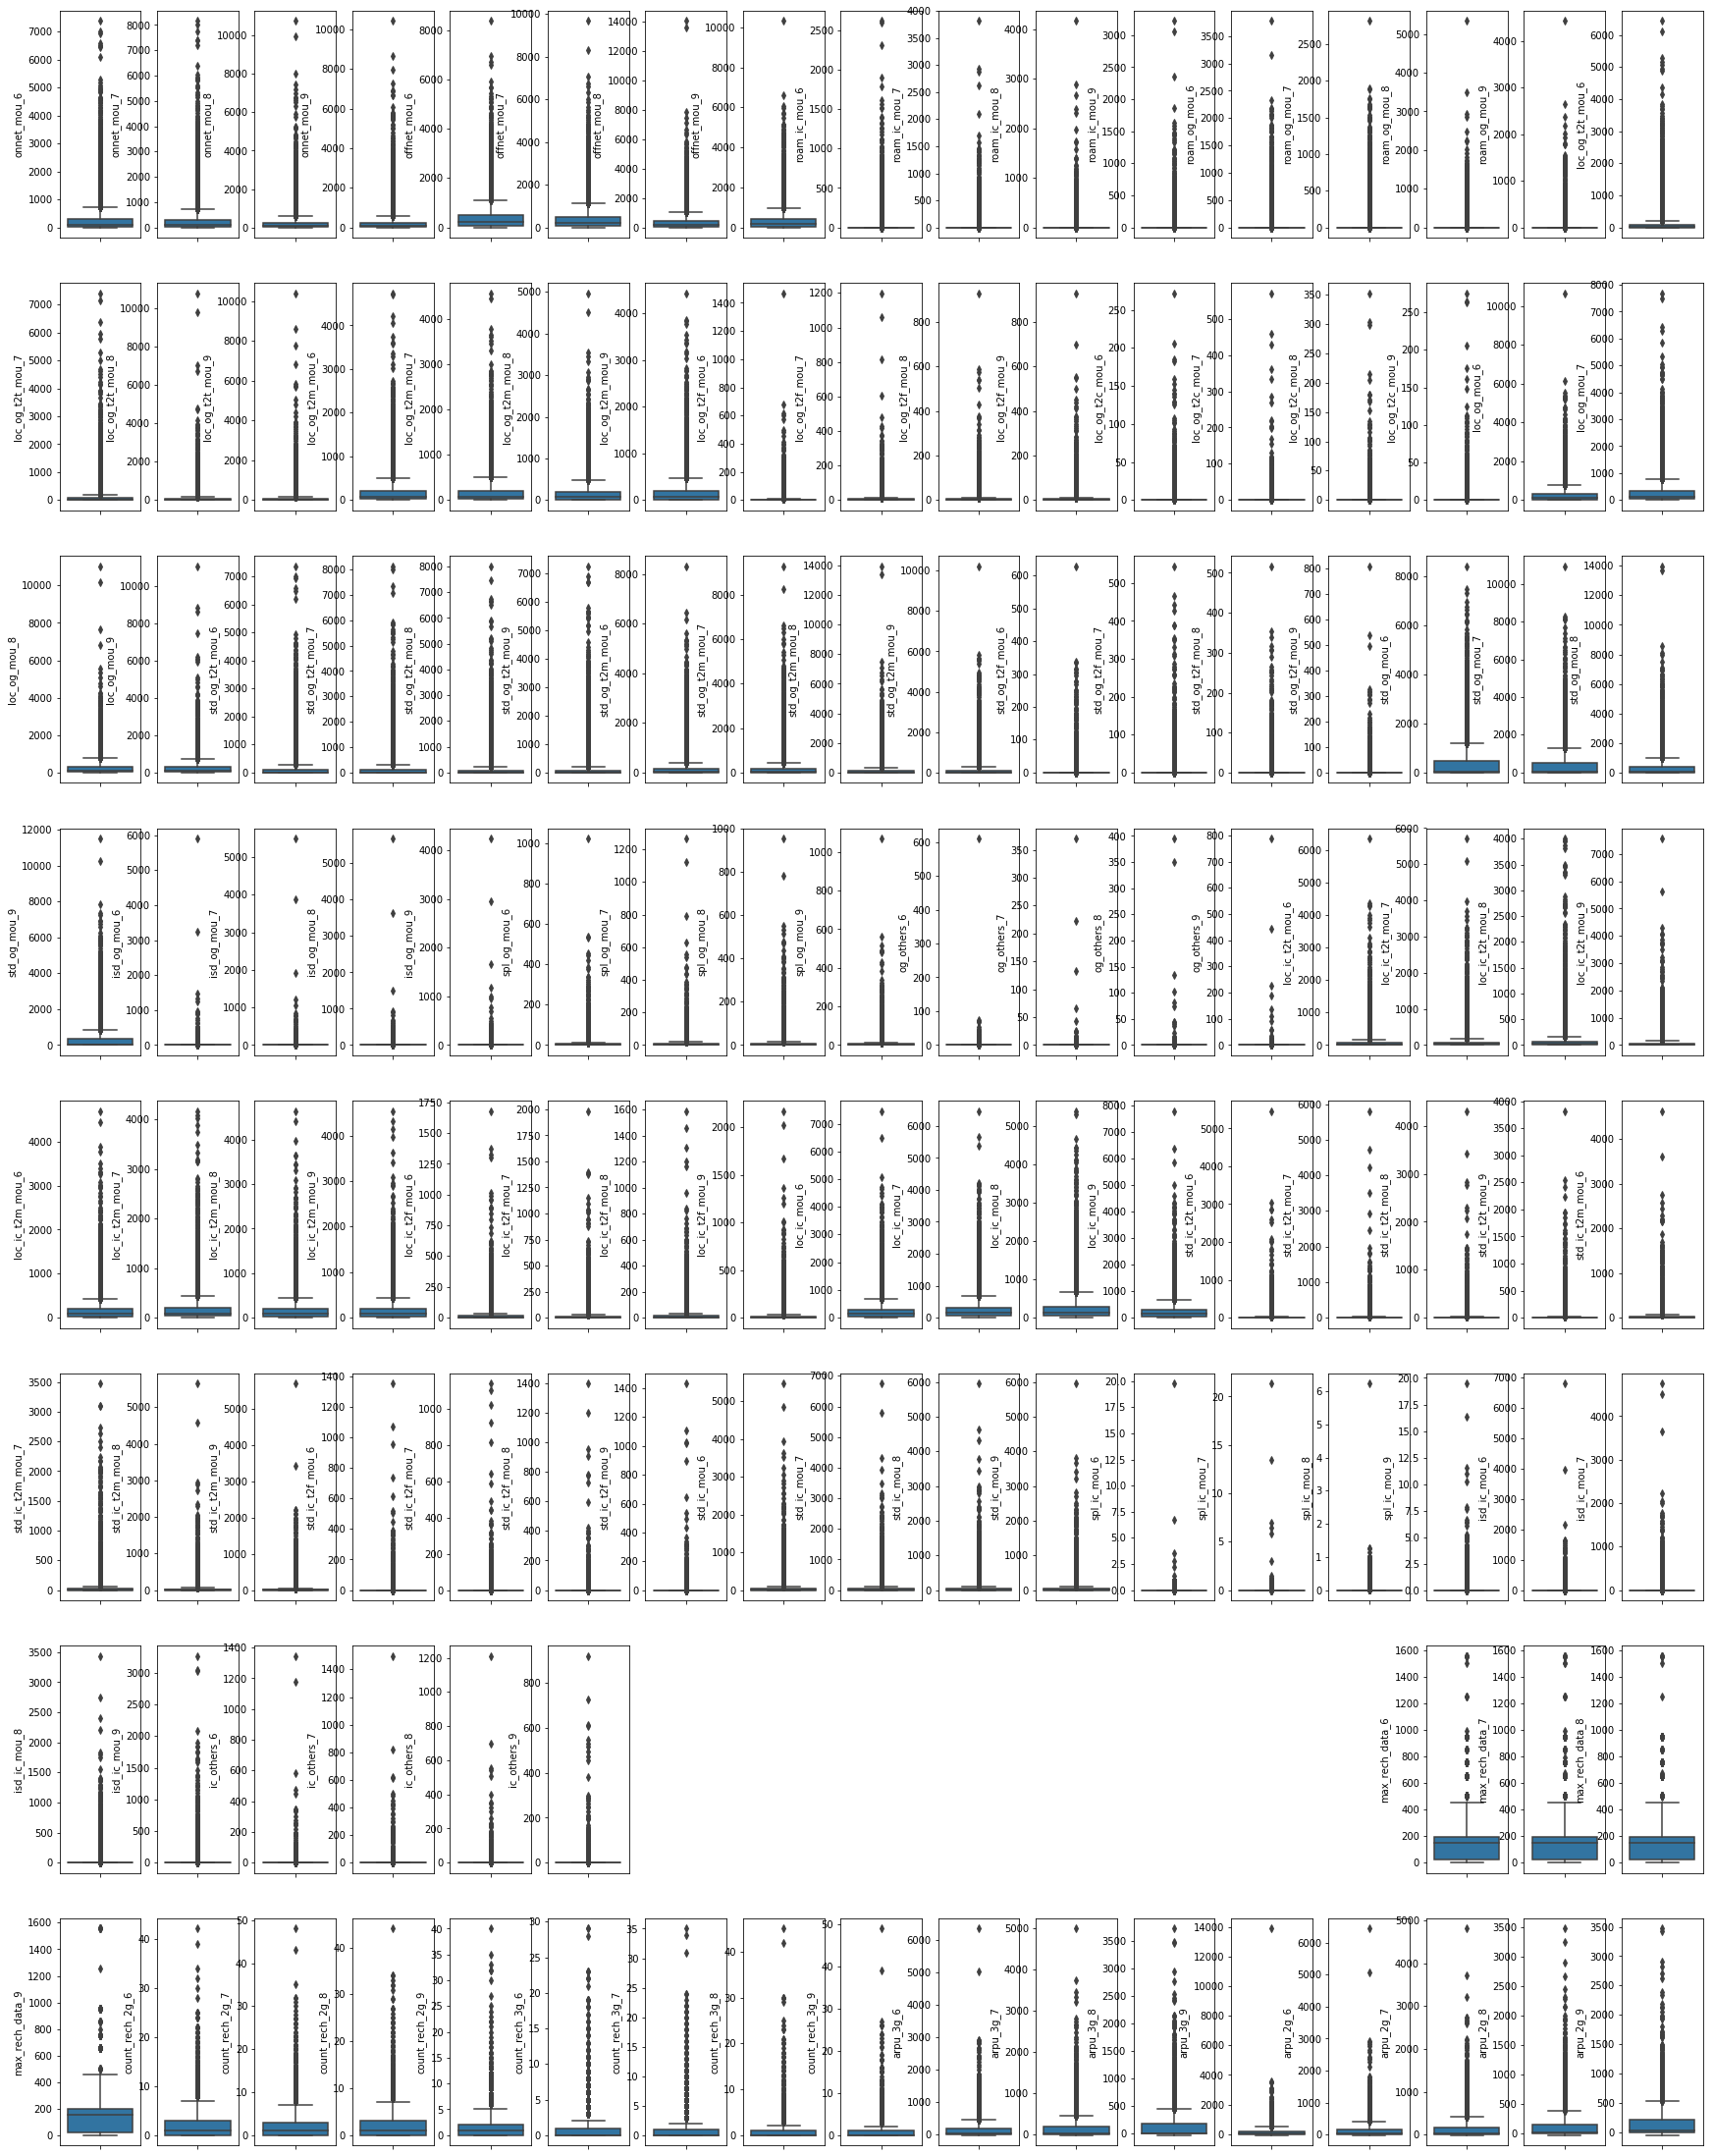

In [23]:
from pylab import *
dates=telecom_hv_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(30,40))
for i, col in enumerate(col_gt_50_na):
    if(col not in dates):
        subplot(8,17,i+1)
        sns.boxplot(telecom_hv_df[col].astype(np.float).dropna(),orient='v')

In [24]:
dates=telecom_hv_df.select_dtypes(include=['object']).columns
for col in dates:
    uniq_num = telecom_hv_df[col].nunique()
    no_of_null = telecom_hv_df[col].isna().sum()
    per_null = round((telecom_hv_df[col].isna().sum()/telecom_hv_df.shape[0])*100,2)
    print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)

Column:  date_of_last_rech_6 , No of unique values:  30 , no of null: 73  ,percentage null: 0.24
Column:  date_of_last_rech_7 , No of unique values:  31 , no of null: 98  ,percentage null: 0.33
Column:  date_of_last_rech_8 , No of unique values:  31 , no of null: 583  ,percentage null: 1.94
Column:  date_of_last_rech_9 , No of unique values:  30 , no of null: 815  ,percentage null: 2.72
Column:  date_of_last_rech_data_6 , No of unique values:  30 , no of null: 13245  ,percentage null: 44.15
Column:  date_of_last_rech_data_7 , No of unique values:  31 , no of null: 12944  ,percentage null: 43.15
Column:  date_of_last_rech_data_8 , No of unique values:  31 , no of null: 14048  ,percentage null: 46.83
Column:  date_of_last_rech_data_9 , No of unique values:  30 , no of null: 14781  ,percentage null: 49.27


In [25]:
## Dropping columns with more than 50% null value
telecom_hv_df.drop(columns=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
#Dropping date with null value
dates=telecom_hv_df.select_dtypes(include=['object']).columns
for col in dates:
    print(telecom_hv_df[col].value_counts())

6/30/2014    8376
6/29/2014    5333
6/28/2014    3666
6/27/2014    3160
6/26/2014    1827
6/25/2014    1324
6/24/2014    1042
6/23/2014     703
6/21/2014     639
6/14/2014     549
6/22/2014     526
6/17/2014     456
6/20/2014     398
6/18/2014     388
6/19/2014     387
6/12/2014     213
6/13/2014     210
6/16/2014     203
6/15/2014     141
6/11/2014      81
6/8/2014       61
6/7/2014       47
6/10/2014      47
6/5/2014       33
6/9/2014       27
6/3/2014       25
6/6/2014       24
6/4/2014       19
6/2/2014       13
6/1/2014       10
Name: date_of_last_rech_6, dtype: int64
7/31/2014    7610
7/30/2014    5287
7/29/2014    3476
7/28/2014    2793
7/25/2014    1926
7/27/2014    1789
7/26/2014    1601
7/24/2014     927
7/22/2014     653
7/15/2014     587
7/23/2014     563
7/16/2014     457
7/20/2014     421
7/21/2014     391
7/19/2014     367
7/17/2014     291
7/18/2014     252
7/10/2014      73
7/14/2014      71
7/9/2014       71
7/12/2014      59
7/13/2014      56
7/11/2014      51
7/7/20

In [27]:
telecom_hv_df['date_of_last_rech_6']=telecom_hv_df['date_of_last_rech_6'].fillna('6/30/2014')
telecom_hv_df['date_of_last_rech_7']=telecom_hv_df['date_of_last_rech_7'].fillna('7/31/2014')
telecom_hv_df['date_of_last_rech_8']=telecom_hv_df['date_of_last_rech_8'].fillna('8/31/2014')
telecom_hv_df['date_of_last_rech_9']=telecom_hv_df['date_of_last_rech_9'].fillna('9/29/2014')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [28]:
print(telecom_hv_df.select_dtypes(include=['object']).columns)
dates=telecom_hv_df.select_dtypes(include=['object']).columns
for col_date in dates:
    telecom_hv_df[col_date] = pd.to_datetime(telecom_hv_df[col_date])

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
telecom_hv_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'vbc_3g_9', 'total_recharge_data_amt_6', 'total_recharge_data_amt_7',
       'total_recharge_data_amt_8', 'total_recharge_data_amt_9',
       'net_recharge_amt_6', 'net_recharge_amt_7', 'net_recharge_amt_8',
       'net_recharge_amt_9', 'avg_rech_amt_6_7'],
      dtype='object', length=211)

In [30]:
for col in telecom_hv_df.columns:
    uniq_num = telecom_hv_df[col].nunique()
    no_of_null = telecom_hv_df[col].isna().sum()
    per_null = round((telecom_hv_df[col].isna().sum()/telecom.shape[0])*100,2)
    if per_null>0:
        print('Column: ',col,', No of unique values: ',uniq_num,', no of null:',no_of_null,' ,percentage null:',per_null,)
        telecom_hv_df[col]=telecom_hv_df[col].fillna(value=0)

Column:  onnet_mou_6 , No of unique values:  16890 , no of null: 545  ,percentage null: 0.55
Column:  onnet_mou_7 , No of unique values:  16987 , no of null: 537  ,percentage null: 0.54
Column:  onnet_mou_8 , No of unique values:  15872 , no of null: 1174  ,percentage null: 1.17
Column:  onnet_mou_9 , No of unique values:  15075 , no of null: 1901  ,percentage null: 1.9


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Column:  offnet_mou_6 , No of unique values:  21220 , no of null: 545  ,percentage null: 0.55
Column:  offnet_mou_7 , No of unique values:  21263 , no of null: 537  ,percentage null: 0.54
Column:  offnet_mou_8 , No of unique values:  20163 , no of null: 1174  ,percentage null: 1.17
Column:  offnet_mou_9 , No of unique values:  19150 , no of null: 1901  ,percentage null: 1.9
Column:  roam_ic_mou_6 , No of unique values:  4048 , no of null: 545  ,percentage null: 0.55
Column:  roam_ic_mou_7 , No of unique values:  3385 , no of null: 537  ,percentage null: 0.54
Column:  roam_ic_mou_8 , No of unique values:  3433 , no of null: 1174  ,percentage null: 1.17
Column:  roam_ic_mou_9 , No of unique values:  3136 , no of null: 1901  ,percentage null: 1.9
Column:  roam_og_mou_6 , No of unique values:  4744 , no of null: 545  ,percentage null: 0.55
Column:  roam_og_mou_7 , No of unique values:  3994 , no of null: 537  ,percentage null: 0.54
Column:  roam_og_mou_8 , No of unique values:  4001 , no o

Column:  std_ic_mou_8 , No of unique values:  7690 , no of null: 1174  ,percentage null: 1.17
Column:  std_ic_mou_9 , No of unique values:  7387 , no of null: 1901  ,percentage null: 1.9
Column:  spl_ic_mou_6 , No of unique values:  78 , no of null: 545  ,percentage null: 0.55
Column:  spl_ic_mou_7 , No of unique values:  92 , no of null: 537  ,percentage null: 0.54
Column:  spl_ic_mou_8 , No of unique values:  80 , no of null: 1174  ,percentage null: 1.17
Column:  spl_ic_mou_9 , No of unique values:  279 , no of null: 1901  ,percentage null: 1.9
Column:  isd_ic_mou_6 , No of unique values:  3284 , no of null: 545  ,percentage null: 0.55
Column:  isd_ic_mou_7 , No of unique values:  3489 , no of null: 537  ,percentage null: 0.54
Column:  isd_ic_mou_8 , No of unique values:  3357 , no of null: 1174  ,percentage null: 1.17
Column:  isd_ic_mou_9 , No of unique values:  3204 , no of null: 1901  ,percentage null: 1.9
Column:  ic_others_6 , No of unique values:  1206 , no of null: 545  ,perc

In [31]:
print(list(telecom_hv_df.select_dtypes(include=['object']).columns))

[]


In [32]:
telecom_hv_df.shape

(30001, 211)

In [33]:
telecom_hv_df['days_last_rech_6']=telecom_hv_df.date_of_last_rech_6.dt.day
telecom_hv_df['days_last_rech_7']=telecom_hv_df.date_of_last_rech_7.dt.day
telecom_hv_df['days_last_rech_8']=telecom_hv_df.date_of_last_rech_8.dt.day
telecom_hv_df['days_last_rech_9']=telecom_hv_df.date_of_last_rech_9.dt.day

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [34]:
telecom_hv_df=telecom_hv_df.drop(columns=dates)

In [35]:
telecom_hv_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9,total_recharge_data_amt_6,total_recharge_data_amt_7,total_recharge_data_amt_8,total_recharge_data_amt_9,net_recharge_amt_6,net_recharge_amt_7,net_recharge_amt_8,net_recharge_amt_9,avg_rech_amt_6_7,days_last_rech_6,days_last_rech_7,days_last_rech_8,days_last_rech_9
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,101.20,0.00,30.40,3.58,252.0,252.

In [36]:
# Tagging the churned customers based on the 4th month
telecom_hv_df['churn'] = np.where(telecom_hv_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [37]:
telecom_hv_cust=telecom_hv_df

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Calculating the total churn %
ChurnPct = round(100*(telecom_hv_cust["churn"].sum()/len(telecom_hv_cust.index)), 2)
print("% of high-value churn customers: ",ChurnPct)

% of high-value churn customers:  8.14


In [40]:
##Drop columns with _9
month_9_col=[]
for col in telecom_hv_cust.columns:
    if col.endswith('_9'):
        month_9_col.append(col)

In [41]:
month_9_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_recharge_data_amt_9',
 'net_recharge_amt_9',
 'days_last_rech_9']

In [42]:
telecom_hv_cust.drop(columns=month_9_col,inplace=True)

In [43]:
col_with_null = telecom_hv_cust.columns[telecom_hv_cust.isna().any()].tolist()
print(col_with_null)
for col in telecom_hv_cust.columns:
    print(col,telecom_hv_cust[col].dtype)

[]
mobile_number int64
arpu_6 float64
arpu_7 float64
arpu_8 float64
onnet_mou_6 float64
onnet_mou_7 float64
onnet_mou_8 float64
offnet_mou_6 float64
offnet_mou_7 float64
offnet_mou_8 float64
roam_ic_mou_6 float64
roam_ic_mou_7 float64
roam_ic_mou_8 float64
roam_og_mou_6 float64
roam_og_mou_7 float64
roam_og_mou_8 float64
loc_og_t2t_mou_6 float64
loc_og_t2t_mou_7 float64
loc_og_t2t_mou_8 float64
loc_og_t2m_mou_6 float64
loc_og_t2m_mou_7 float64
loc_og_t2m_mou_8 float64
loc_og_t2f_mou_6 float64
loc_og_t2f_mou_7 float64
loc_og_t2f_mou_8 float64
loc_og_t2c_mou_6 float64
loc_og_t2c_mou_7 float64
loc_og_t2c_mou_8 float64
loc_og_mou_6 float64
loc_og_mou_7 float64
loc_og_mou_8 float64
std_og_t2t_mou_6 float64
std_og_t2t_mou_7 float64
std_og_t2t_mou_8 float64
std_og_t2m_mou_6 float64
std_og_t2m_mou_7 float64
std_og_t2m_mou_8 float64
std_og_t2f_mou_6 float64
std_og_t2f_mou_7 float64
std_og_t2f_mou_8 float64
std_og_mou_6 float64
std_og_mou_7 float64
std_og_mou_8 float64
isd_og_mou_6 float64
isd_o

In [44]:
X=telecom_hv_cust.drop(['mobile_number','churn'],axis=1)
y=telecom_hv_cust["churn"]
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [46]:
X_train.shape

(21000, 159)

In [47]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [48]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [49]:
pca.components_

array([[ 3.45117231e-02,  4.62054545e-02,  5.07516450e-02, ...,
         4.95428235e-05,  1.01240466e-04,  1.25399618e-04],
       [ 1.38515096e-01,  1.65956351e-01,  1.75111257e-01, ...,
         5.57124428e-04,  5.39112736e-04,  5.76963355e-04],
       [-6.94244008e-02, -6.78850145e-02, -8.89686110e-03, ...,
        -1.47406900e-04, -5.26632877e-05,  1.40494339e-04],
       ...,
       [-0.00000000e+00, -4.53844991e-18,  9.12129519e-18, ...,
        -7.07069529e-18,  1.22679275e-17,  4.69762805e-18],
       [-0.00000000e+00,  7.94647570e-18, -1.14658500e-17, ...,
        -9.93223091e-19, -3.49945438e-18, -4.09633914e-18],
       [ 0.00000000e+00, -3.65400243e-18, -2.51823051e-18, ...,
         3.68932236e-18, -1.81846338e-18,  2.22991238e-17]])

In [50]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.034512,0.138515,arpu_6
1,0.046205,0.165956,arpu_7
2,0.050752,0.175111,arpu_8
3,-0.007886,0.124004,onnet_mou_6
4,-0.006485,0.147284,onnet_mou_7


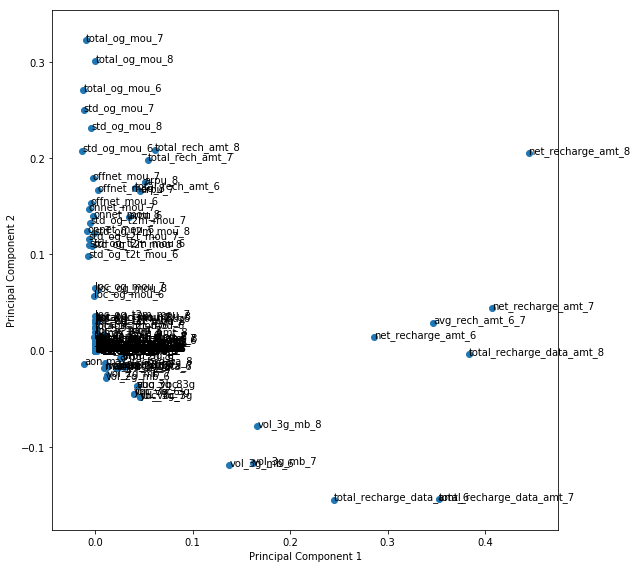

In [51]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [52]:
pca.explained_variance_ratio_

array([3.91976484e-01, 1.24393840e-01, 1.07284120e-01, 6.73664107e-02,
       5.52888781e-02, 4.62924123e-02, 2.85845993e-02, 2.54654493e-02,
       2.36318847e-02, 2.00337247e-02, 1.36865046e-02, 1.32327983e-02,
       9.46710635e-03, 9.29504442e-03, 6.96003702e-03, 6.42779811e-03,
       4.97822741e-03, 4.12489954e-03, 3.73599460e-03, 3.13216256e-03,
       2.98585928e-03, 2.90225730e-03, 2.62705600e-03, 2.08458475e-03,
       1.97255391e-03, 1.87925372e-03, 1.81571073e-03, 1.73385419e-03,
       1.57321952e-03, 1.45154836e-03, 1.16473866e-03, 1.05453411e-03,
       1.00757724e-03, 9.68754974e-04, 7.91068982e-04, 7.40428955e-04,
       6.72369853e-04, 5.36609759e-04, 4.73935348e-04, 4.23279934e-04,
       3.88320607e-04, 3.60566364e-04, 3.44449174e-04, 3.34063761e-04,
       3.11620102e-04, 2.95896784e-04, 2.87182451e-04, 2.75313789e-04,
       2.72776416e-04, 2.57372756e-04, 2.44313722e-04, 2.19329593e-04,
       1.99230428e-04, 1.96317686e-04, 1.84139373e-04, 1.69150366e-04,
      

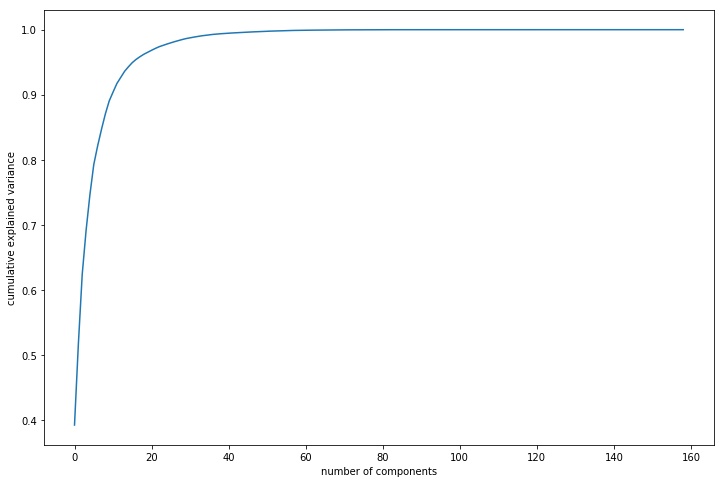

In [53]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [54]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [55]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 40)

In [56]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

In [ ]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

In [ ]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight={ 0:0.92, 1:0.08 })
model_pca = learner_pca.fit(df_train_pca,y_train)

In [ ]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=7,class_weight={ 0:0.92, 1:0.08 })
dt_default.fit(df_train_pca, y_train)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

In [ ]:
# creating a linear model

#model_linear = SVC(kernel='linear')
#model_linear.fit(df_train_pca, y_train)

# predict
#y_pred = model_linear.predict(df_test_pca)


In [ ]:
# confusion matrix and accuracy

# accuracy
#print('class wise report:',metrics.classification_report(y_true=y_test, y_pred=y_pred),"\n")
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))